# Agente Limite de Confiaça Superior (Upper Confidence Bound, UCB)

Leia a explicação do algoritmo no [README.md!](README.md)

In [1]:
import sys
sys.path.append('../')
import bandit #importa o ambient
import numpy as np

## Definindo a Função Argmax

In [2]:
def argmax(Q_values):
    """ (lista) -> índice de maior valor(int)
    Recebe uma lista dos valores Q e retorna o índice do maior valor. Por definição resolve empates escolhendo um deles aleatóriamente.
    """
    max_value = float("-inf")
    ties = []

    for i in range(len(Q_values)):
        if Q_values[i] > max_value:
            max_value = Q_values[i]
            ties = []
        if Q_values[i] == max_value:
            ties.append(i)

    return np.random.choice(ties)

## Definindo o Agente

In [3]:
class UCB(object):
    def __init__(self, k_arms, c=2):
        self.c = c
        self.n_arms = np.zeros(k_arms)
        self.Q_values = np.zeros(k_arms)
        self.last_action = argmax(self.Q_values) #Se é a primeira ação, ela deve ser um argmax 

    def agent_step(self, reward, step):
        """ (float) -> acao(int)
        Dá um step para o Agente atualizando os valores Q. 
        Pega a recompensa do estado e retorna a ação escolhida.
        """ 
        self.n_arms[self.last_action] += 1
        step_size = 1/self.n_arms[self.last_action]
        current_Q = self.Q_values[self.last_action] + step_size * (reward - self.Q_values[self.last_action])
        self.Q_values[self.last_action] = current_Q
        
        current_action = argmax(self.Q_values + np.sqrt(np.log(step)/self.n_arms) * self.c)

        return current_action

## Testando o Agente

In [4]:
import matplotlib.pyplot as plt

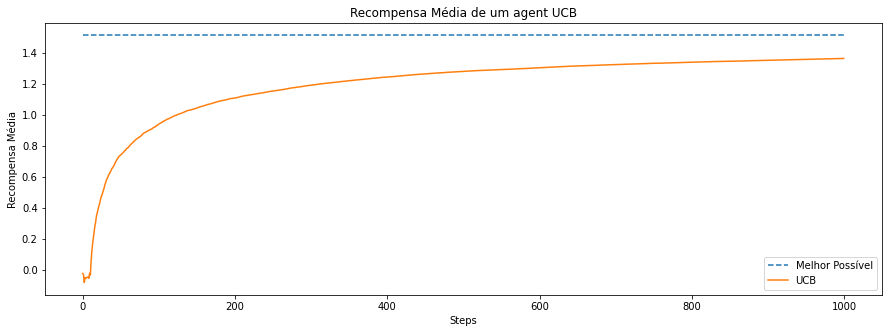

In [6]:
num_runs = 200
num_steps = 1000
np.random.seed(1)
total_means = []

max_mean = 0
for runs in range(num_runs):

    agent = UCB(k_arms=10, c=2)

    env = bandit.GaussianBandit(k_arms=10)

    score = [0]
    means = []

    max_mean += np.max(env.bandits_expectations)

    for steps in range(1, num_steps+1):
        reward = env.gamble(agent.last_action)
        agent.last_action = agent.agent_step(reward, steps)

        score.append(score[-1] + reward)
        means.append(score[-1]/(steps+1))
    total_means.append(means)

plt.figure(figsize=(15,5))
plt.plot([max_mean / num_runs for _ in range(num_steps)], linestyle="--")
plt.plot(np.mean(total_means, axis=0))
plt.legend(["Melhor Possível", "UCB"])
plt.title("Recompensa Média de um agent UCB")
plt.xlabel("Steps")
plt.ylabel("Recompensa Média")
plt.show()